<a href="https://colab.research.google.com/github/Allanx495/Allanx495/blob/main/AL_Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction: Analyzing and Forecasting Stock Prices**

Welcome to the workshop! In this session, you'll learn to:
1. Fetch historical stock price data using a free API.
2. Explore trends in stock prices through visualizations.
3. Build a predictive model for stock price forecasting.
4. Visualize model performance and gain actionable insights.

## **1. Setup**
In this setup, we will:
- Install and import libraries required for data handling, visualization, and modeling.
- Ensure our environment is ready for the workshop.

### **Libraries Overview**
- **yfinance**: Fetch historical stock price data.
- **Pandas**: Handle and manipulate tabular data.
- **Matplotlib**: Create static visualizations like line charts.
- **Plotly**: Build interactive visualizations for deeper analysis.
- **Scikit-learn**: Train and evaluate machine learning models.

In [ ]:
# Install required libraries
!pip install yfinance plotly scikit-learn --quiet

# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **Step 2: Fetch Stock Price Data**
In this step, we will:
- Use the `yfinance` library to fetch historical stock data for a selected company.
- Display the structure of the data to understand what it contains.

### **About the Data**
The data includes:
- **Open, High, Low, and Close Prices**: Daily stock prices.
- **Volume**: Number of shares traded daily.
- **Date**: The trading date.

In [ ]:
# Fetch historical data for Apple Inc. (AAPL)
ticker = 'AAPL'  # Replace with another stock ticker if desired
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')

# Display the first few rows of the dataset
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.796043,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,72.088295,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.662697,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,72.320976,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.484337,75.797501,76.110001,74.290001,74.290001,132079200


## **Step 3: Exploratory Data Analysis (EDA)**
In this step, we will:
1. Visualize the stock's closing price over time.
2. Add moving averages to identify trends and reduce noise.

### **Why EDA Matters**
- Helps us understand the dataset's structure and content.
- Reveals trends and patterns that may inform model-building.

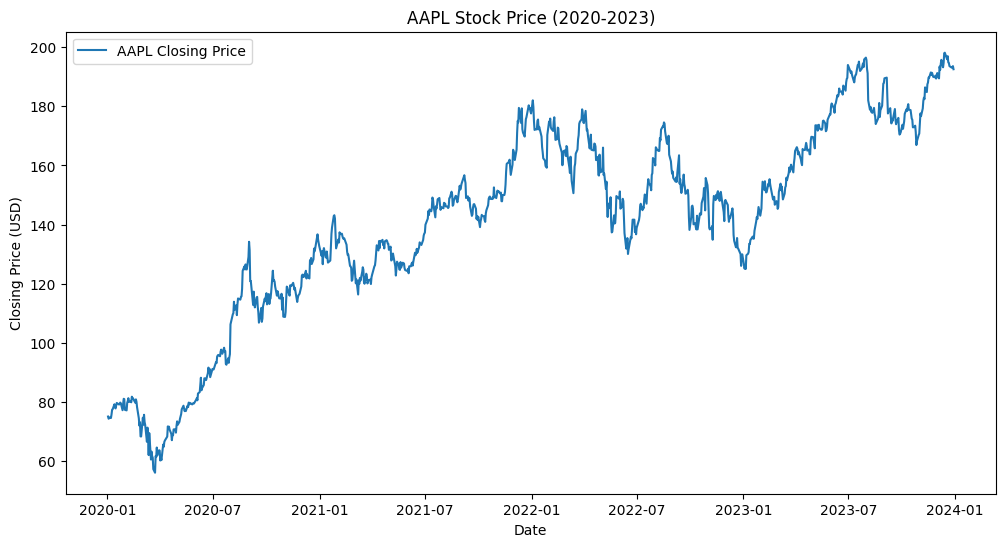

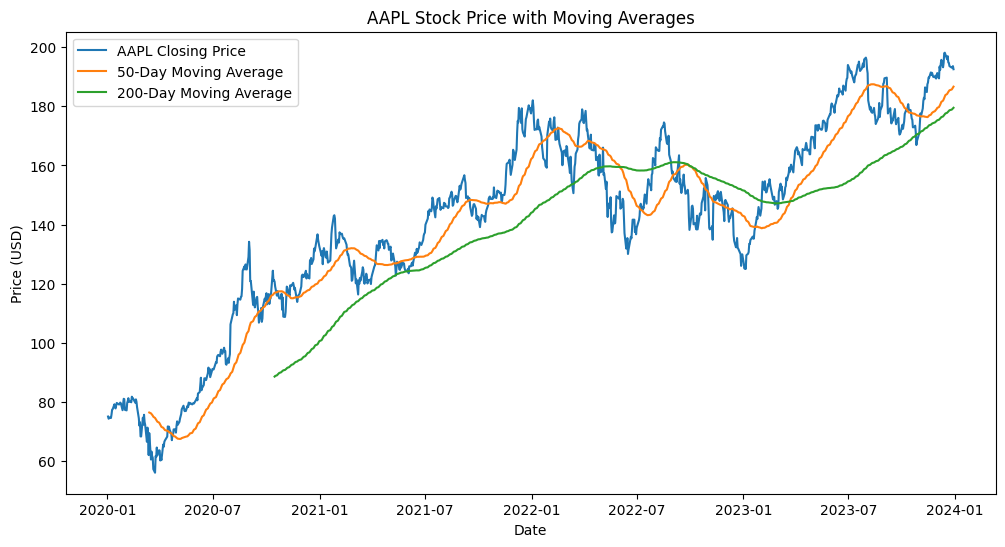

In [ ]:
# Plot historical closing prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f"{ticker} Closing Price")
plt.title(f"{ticker} Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

# Add Moving Averages (50-day and 200-day)
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

# Plot closing prices with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label=f"{ticker} Closing Price")
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.plot(data['MA200'], label='200-Day Moving Average')
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

## **Step 4: Feature Engineering**
In this step, we will:
- Create new features based on the existing data to improve model predictions.
- Use the previous day’s closing price as a feature to predict the next day’s price.

### **Why Feature Engineering?**
Features are the inputs that the model learns from. Adding relevant features improves prediction accuracy.

In [ ]:
# Create a lagged feature: Previous day's closing price
data['Prev_Close'] = data['Close'].shift(1)
data = data.dropna()  # Remove missing rows due to shifting

# Define features (X) and target (y)
X = data[['Prev_Close']]  # Feature: Previous day's closing price
y = data['Close']         # Target: Today's closing price

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 5: Build a Linear Regression Model**
In this step, we will:
- Train a simple Linear Regression model to predict stock prices.
- Evaluate its performance using error metrics.

### **About the Model**
Linear Regression predicts the target variable by learning a linear relationship between the features (X) and the target (y).


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 2.01
Root Mean Squared Error (RMSE): 2.64


## **Step 6: Visualize Predictions**
In this step, we will:
- Compare the model's predictions with actual prices.
- Use static and interactive plots for better insights.

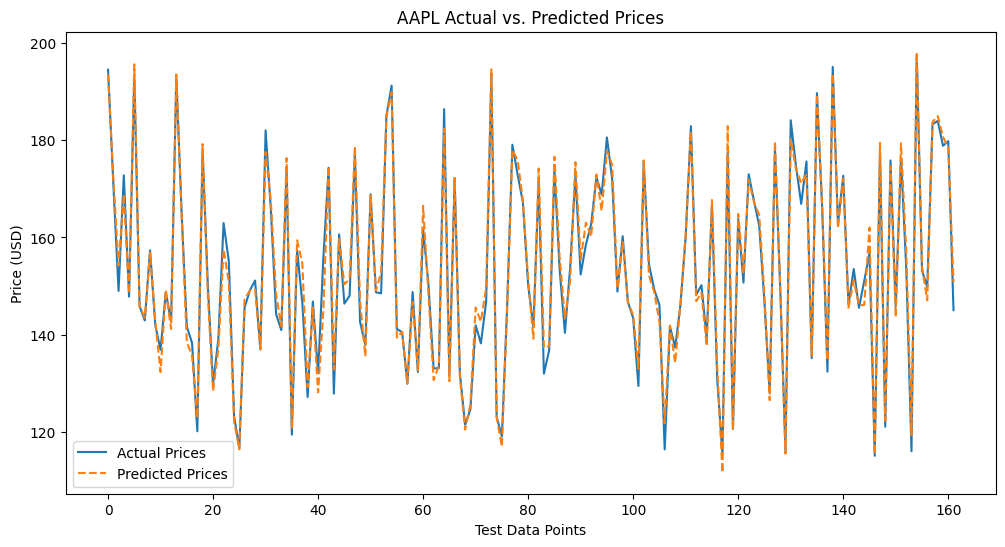

In [ ]:
# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Prices")
plt.plot(y_pred, label="Predicted Prices", linestyle='--')
plt.title(f"{ticker} Actual vs. Predicted Prices")
plt.xlabel("Test Data Points")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Interactive visualization with Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=y_test.values, name="Actual Prices"))
fig.add_trace(go.Scatter(y=y_pred, name="Predicted Prices", mode="lines"))
fig.update_layout(title=f"{ticker} Price Predictions", xaxis_title="Test Data Points", yaxis_title="Price (USD)")
fig.show()

## **Step 7: Next Steps**
In this final step, we will:
- Reflect on the model's performance and identify areas for improvement.
- Explore suggestions for further learning and experimentation.

### **Suggestions**
1. Try predicting prices for a different stock.
2. Add more features, such as moving averages or trading volume.
3. Experiment with advanced machine learning models like LSTMs for time series data.